# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


## Selecting Ads to be shown to user using Random Selection method

In [21]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    total_reward = total_reward + reward

In [22]:
print(total_reward)

1229


### Visualising the results using Random Selection

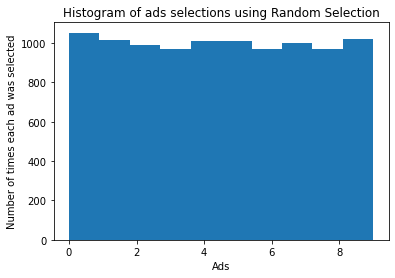

In [14]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections using Random Selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Selecting Ads to be shown to user using UCB (Upper Confidence Bound)

In [17]:
import math
N = 10000  # Total number of users targeted
d = 10     # Total number of different Ads shown to users
ads_selected = []    # List of all the different ads selected by each user
total_reward = 0

#STEP-1: At each round 'n', we will consider two numbers for each Ad 'i':
numbers_of_selections = [0] * d    # Number of times the Ad 'i' was selected up to round 'n'
sums_of_rewards = [0] * d          # The sum of rewards of the Ad 'i' up to round 'n'


#STEP-2: From these two numbers we will compute:
#1) Average reward = (sums_of_rewards)/(numbers_of_selections)
#2) Upper confidence = Average reward + delta_i,     where delta_i = sqrt(3/2 * log(n + 1) / numbers_of_selections[i])
# Iterationg through 'n' number of users
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    # Iterating through 'ith' Ad
    for i in range(0, d):
        # Selecting each Ad for first 10 rounds as we dont have any information of the Ad, whether they earn reward=1 or 0
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i   # to keep track of the Ad that has the max upper bound
            
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [18]:
print(total_reward)

2178


### Visualising the results using UCB

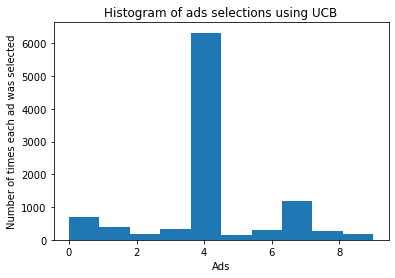

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections using UCB')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Conclusion

Using Random Selection of Ads we get reward of around 1200.
On the other hand using UCB we get reward of 2178. 
>This is beacause with 'Random Selection' we were simply exploring all our Ads.
Whereas in case of UCB when it had little knowledge of the available actions, and a low confidence in the best actions to take, the exploration part of its equation causes it to search through the set of all possible actions.
As exploration progresses better estimates were formed for the rewards given by each action. 
Therefore the level of exploration decreased and gradually the focus of the algorithm swings from exploration to favour exploitation (which we found out to be Ad 4). 
By shifting this balance as time progresses the UCB algorithm reduces its regret and, consequently, is able to achieve a much lower level of regret.